## Part 1: Import Statements

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Part 2: Import processed data

In [3]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [4]:

#splitting the data into train, validation, test
X, X_test, y, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=42)

In [5]:
#splitting the data into train and validation
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75, random_state=42)

# X_train,X_test,X_cv  &  Y_train,Y_test,Y_cv will be created

In [6]:
X_train.sample(5)

18508    theres much groupie bitches hard come across g...
4120     im trying critical jr literally looks like ate...
3955                       yep lmao hectic weeks waddup ho
19180      trash cans always demanding new music gawd tyga
7103              lol yeah birds chirping outside bastards
Name: tweet, dtype: object

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [7]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_cv
X_cv_count = count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'stop': 13309,
 'spoiling': 12986,
 'fags': 4628,
 'wcw': 15221,
 'babes': 805,
 'love': 8196,
 'thse': 14058,
 'sexy': 12145,
 'bitches': 1302,
 'bestfriend': 1181,
 'babe': 804,
 'yanks': 15762,
 'coming': 2736,
 'disparagement': 3764,
 'pride': 10705,
 'rather': 11121,
 'jack': 7110,
 'fuck': 5249,
 'hoes': 6379,
 'tbh': 13780,
 'shit': 12260,
 'boring': 1545,
 'give': 5558,
 'wife': 15449,
 'lmfao': 8072,
 'little': 8038,
 'like': 7968,
 'message': 8649,
 'hoe': 6363,
 'need': 9246,
 'plan': 10391,
 'stuff': 13400,
 'thats': 13929,
 'saying': 11886,
 'ive': 7100,
 'pinto': 10352,
 'since': 12441,
 'dude': 4065,
 'iphone': 7026,
 'beginning': 1107,
 'gerryshalloweenparty': 5478,
 'halloween': 5985,
 'yesterday': 15833,
 'stupid': 13412,
 'nigger': 9376,
 'youre': 15879,
 'dismissed': 3761,
 'bitch': 1290,
 'wan': 15127,
 'na': 9137,
 'play': 10412,
 'thumper': 14070,
 'tounge': 14276,
 'punching': 10878,
 'smelly': 12671,
 'turtle': 14530,
 'pussy': 10907,
 'lady': 7669,
 'next': 9

Word n grams: bigrams

In [8]:
#Count Vectorizing the X_train
bigram_count_vec = CountVectorizer(ngram_range=(2,2))
bigram_count_vec.fit(X_train)

X_train_count_bigram = bigram_count_vec.transform(X_train)
X_train_count_bigram = X_train_count_bigram.toarray()

#Count Vectorizing the X_cv
X_cv_count = bigram_count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count_bigram = bigram_count_vec.transform(X_test)
X_test_count_bigram = X_test_count_bigram.toarray()

bigram_count_vec.vocabulary_

{'stop spoiling': 60260,
 'spoiling fags': 59187,
 'wcw babes': 69044,
 'babes love': 3312,
 'love thse': 39463,
 'thse sexy': 63968,
 'sexy bitches': 55945,
 'bitches bestfriend': 7014,
 'bestfriend babe': 4792,
 'yanks coming': 72221,
 'coming disparagement': 12899,
 'disparagement pride': 16695,
 'rather jack': 51946,
 'jack fuck': 33498,
 'fuck hoes': 23032,
 'hoes tbh': 30657,
 'tbh shit': 62096,
 'shit boring': 56296,
 'boring give': 8308,
 'give wife': 25626,
 'wife lmfao': 70067,
 'lmfao little': 38311,
 'little like': 37968,
 'message hoe': 41385,
 'hoe need': 29981,
 'need plan': 43924,
 'plan stuff': 49151,
 'thats like': 62932,
 'like saying': 37397,
 'saying ive': 54754,
 'ive pinto': 33457,
 'pinto since': 49026,
 'since dude': 57287,
 'dude ive': 17919,
 'ive iphone': 33445,
 'iphone since': 33239,
 'since beginning': 57278,
 'gerryshalloweenparty halloween': 24357,
 'halloween yesterday': 28095,
 'yesterday stupid': 72704,
 'stupid nigger': 60660,
 'youre dismissed': 73

Word n grams: unigram+bigrams

In [10]:
#Count Vectorizing the X_train
unigram_bigram_count_vec = CountVectorizer(ngram_range=(1,2))
unigram_bigram_count_vec.fit(X_train)

X_train_count_unigram_bigram = unigram_bigram_count_vec.transform(X_train)
X_train_count_unigram_bigram = X_train_count_unigram_bigram.toarray()

#Count Vectorizing the X_cv
X_cv_count = unigram_bigram_count_vec.transform(X_cv)
X_cv_count = X_cv_count.toarray()

#Count Vectorizing the X_test
X_test_count_unigram_bigram = unigram_bigram_count_vec.transform(X_test)
X_test_count_unigram_bigram = X_test_count_unigram_bigram.toarray()

unigram_bigram_count_vec.vocabulary_

{'stop': 73483,
 'spoiling': 72173,
 'fags': 25105,
 'stop spoiling': 73570,
 'spoiling fags': 72174,
 'wcw': 84264,
 'babes': 4117,
 'love': 47425,
 'thse': 78026,
 'sexy': 68083,
 'bitches': 8268,
 'bestfriend': 5973,
 'babe': 4107,
 'wcw babes': 84266,
 'babes love': 4118,
 'love thse': 47660,
 'thse sexy': 78027,
 'sexy bitches': 68091,
 'bitches bestfriend': 8317,
 'bestfriend babe': 5974,
 'yanks': 87979,
 'coming': 15629,
 'disparagement': 20459,
 'pride': 60857,
 'yanks coming': 87984,
 'coming disparagement': 15636,
 'disparagement pride': 20460,
 'rather': 63052,
 'jack': 40603,
 'fuck': 28144,
 'hoes': 36577,
 'tbh': 75871,
 'shit': 68523,
 'boring': 9848,
 'give': 31108,
 'wife': 85491,
 'lmfao': 46371,
 'little': 45961,
 'like': 44728,
 'rather jack': 63068,
 'jack fuck': 40609,
 'fuck hoes': 28282,
 'hoes tbh': 37037,
 'tbh shit': 75877,
 'shit boring': 68557,
 'boring give': 9854,
 'give wife': 31185,
 'wife lmfao': 85517,
 'lmfao little': 46384,
 'little like': 46007,
 

Vocabulary of train and test set with respective counts

In [ ]:
words = []
amounts = []
for key, value in count_vec.vocabulary_.items():
    words.append(key)
    amounts.append(value)

word_counts = pd.DataFrame(words, columns = ["words"])
word_counts["amounts"] = amounts

In [ ]:
word_counts.sort_values(by = "amounts", ascending = False, inplace = True)

TFIDF Vectorization of unigram

In [22]:
#TFIDF Vectorizing the X_train via unigrams by default

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


TFIDF Vectorization of bigram

In [12]:
#TFIDF Vectorizing the X_train via bigrams

tfidf_bigram = TfidfVectorizer(ngram_range=(2, 2))

X_train_tf_bigram = tfidf_bigram.fit_transform(X_train)
X_train_tf_bigram = X_train_tf_bigram.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf_bigram.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf_bigram = tfidf_bigram.transform(X_test)
X_test_tf_bigram = X_test_tf_bigram.toarray()

TFIDF Vectorization of unigram and bigram

In [17]:
#TFIDF Vectorizing the X_train via unigrams and bigrams

tfidf_unigram_bigram = TfidfVectorizer(ngram_range=(1, 2))

X_train_tf_unigram_bigram = tfidf_unigram_bigram.fit_transform(X_train)
X_train_tf_unigram_bigram = X_train_tf_unigram_bigram.toarray()

#Vectorizing the X_cv
X_cv_tf = tfidf_unigram_bigram.transform(X_cv)
X_cv_tf = X_cv_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf_unigram_bigram = tfidf_unigram_bigram.transform(X_test)
X_test_tf_unigram_bigram = X_test_tf_unigram_bigram.toarray()

Balancing training data

In [13]:

def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data for unigram

In [8]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling CountVectorized training data for bigram

In [14]:
X_train_over_count_bigram, y_train_over_count_bigram = oversample(X_train_count_bigram, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling CountVectorized training data for unigram and bigram

In [19]:
X_train_over_count_unigram_bigram, y_train_over_count_unigram_bigram = oversample(X_train_count_unigram_bigram, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling TFIDF-Vectorized  training data for unigram

In [23]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling TFIDF-Vectorized  training data for bigram

In [14]:
X_train_over_tf_bigram, y_train_over_tf_bigram = oversample(X_train_tf_bigram, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


Oversampling TFIDF-Vectorized  training data for unigrams and bigrams

In [18]:
X_train_over_tf_unigram_bigram, y_train_over_tf_unigram_bigram = oversample(X_train_tf_unigram_bigram, y_train)

Before Oversampling: Counter({1: 11062, 2: 2437, 0: 820})
After Oversampling: Counter({1: 11062, 2: 11062, 0: 11062})


## Models

In [15]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confusion matrix:")
    print(cm)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    sns.heatmap((cm_percent), annot = True, cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

## Naive Bayes

## Count Vectorization

ai) MultinomialNB and data with CountVectorizations(unigrams)

In [10]:
# Initalising model
nb = MultinomialNB()

# Train and predict
nb.fit(X_train_over_count, y_train_over_count)
y_preds = nb.predict(X_test_count)


              precision    recall  f1-score   support

        Hate       0.24      0.51      0.33       280
   Offensive       0.93      0.88      0.90      3715
     Neither       0.86      0.75      0.80       778

    accuracy                           0.83      4773
   macro avg       0.68      0.71      0.68      4773
weighted avg       0.88      0.83      0.85      4773

The confusion matrix:
[[ 144  379   68]
 [ 120 3255  124]
 [  16   81  586]]


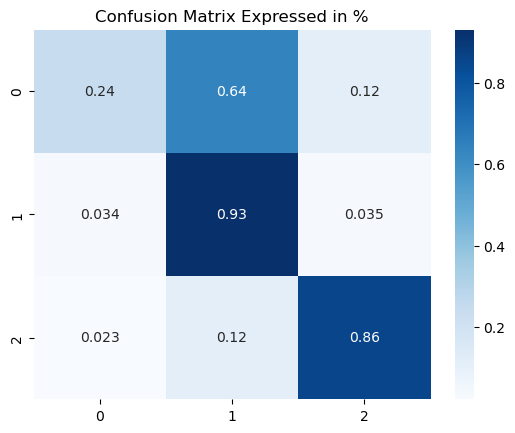

In [11]:
# output statistics
printModelStats(y_preds, y_test)

aii) MultinomialNB and data with CountVectorizations(bigrams)

In [16]:
# Initalising model
nbb = MultinomialNB()

# Train and predict
nbb.fit(X_train_over_count_bigram, y_train_over_count_bigram)
y_preds = nbb.predict(X_test_count_bigram)

              precision    recall  f1-score   support

        Hate       0.11      0.49      0.17       280
   Offensive       0.91      0.74      0.82      3715
     Neither       0.65      0.40      0.49       778

    accuracy                           0.67      4773
   macro avg       0.55      0.54      0.49      4773
weighted avg       0.82      0.67      0.73      4773

The confusion matrix:
[[ 136  811  329]
 [ 131 2748  140]
 [  13  156  309]]


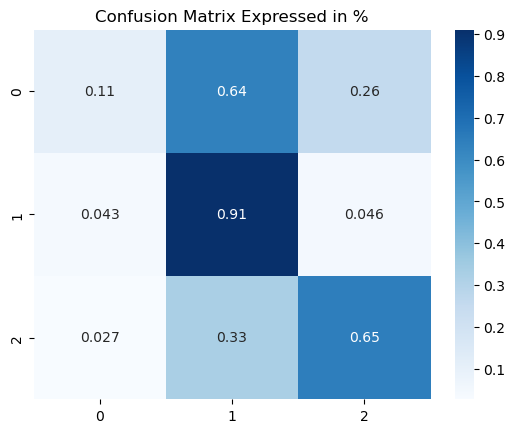

In [17]:
# output statistics
printModelStats(y_preds, y_test)

aiii) MultinomialNB and data with CountVectorizations(unigrams and bigrams)

In [20]:
# Initalising model
nbbb = MultinomialNB()

# Train and predict
nbbb.fit(X_train_over_count_unigram_bigram, y_train_over_count_unigram_bigram)
y_preds = nbbb.predict(X_test_count_unigram_bigram)

              precision    recall  f1-score   support

        Hate       0.27      0.48      0.35       280
   Offensive       0.93      0.89      0.91      3715
     Neither       0.85      0.76      0.80       778

    accuracy                           0.85      4773
   macro avg       0.68      0.71      0.69      4773
weighted avg       0.87      0.85      0.86      4773

The confusion matrix:
[[ 135  306   57]
 [ 133 3315  132]
 [  12   94  589]]


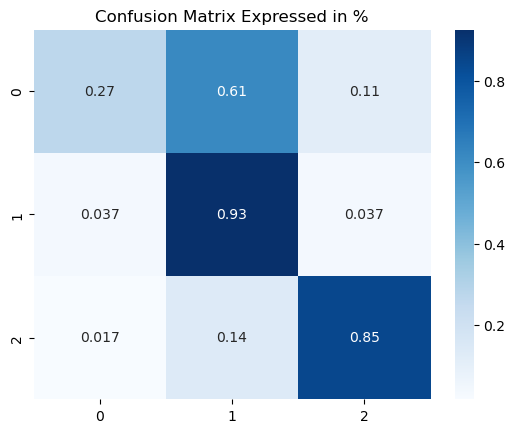

In [21]:
# output statistics
printModelStats(y_preds, y_test)

## TF-IDF

b) MultinomialNB and data with TF-IDF Vectorizations(unigram)

              precision    recall  f1-score   support

        Hate       0.22      0.56      0.31       280
   Offensive       0.93      0.84      0.88      3715
     Neither       0.80      0.71      0.76       778

    accuracy                           0.80      4773
   macro avg       0.65      0.70      0.65      4773
weighted avg       0.86      0.80      0.83      4773

The confusion matrix:
[[ 156  481   80]
 [ 109 3113  142]
 [  15  121  556]]


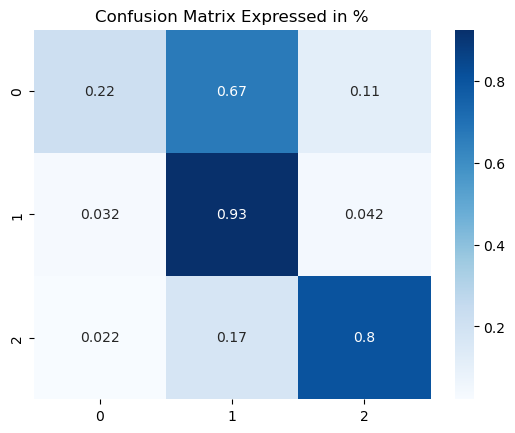

In [25]:
# Initalising model
clf = MultinomialNB()

# Train and predict
clf.fit(X_train_over_tf, y_train_over_tf)
y_preds = clf.predict(X_test_tf)

# output statistics
printModelStats(y_preds, y_test)

bii) MultinomialNB and data with TF-IDF Vectorizations(bigram)

              precision    recall  f1-score   support

        Hate       0.11      0.53      0.18       280
   Offensive       0.91      0.72      0.80      3715
     Neither       0.61      0.40      0.49       778

    accuracy                           0.66      4773
   macro avg       0.55      0.55      0.49      4773
weighted avg       0.82      0.66      0.72      4773

The confusion matrix:
[[ 147  860  331]
 [ 120 2671  134]
 [  13  184  313]]


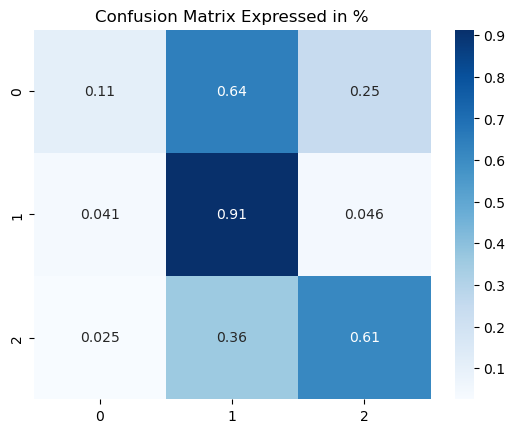

In [16]:
# Initalising model
clff = MultinomialNB()

# Train and predict
clff.fit(X_train_over_tf_bigram, y_train_over_tf_bigram)
y_preds = clff.predict(X_test_tf_bigram)

# output statistics
printModelStats(y_preds, y_test)

biii) MultinomialNB and data with TF-IDF Vectorizations(unigrams and bigrams)

              precision    recall  f1-score   support

        Hate       0.25      0.59      0.35       280
   Offensive       0.94      0.85      0.89      3715
     Neither       0.80      0.76      0.78       778

    accuracy                           0.82      4773
   macro avg       0.66      0.74      0.68      4773
weighted avg       0.88      0.82      0.84      4773

The confusion matrix:
[[ 165  411   77]
 [ 100 3170  107]
 [  15  134  594]]


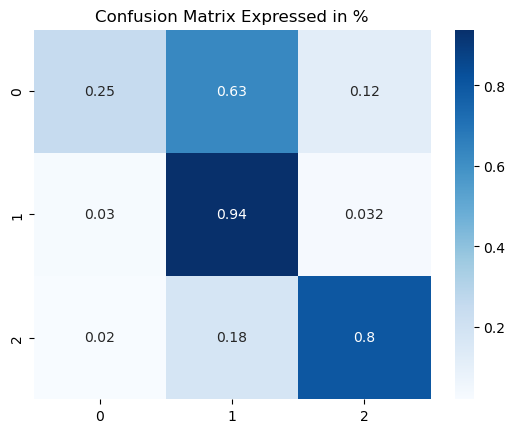

In [19]:
# Initalising model
clfff = MultinomialNB()

# Train and predict
clfff.fit(X_train_over_tf_unigram_bigram, y_train_over_tf_unigram_bigram)
y_preds = clfff.predict(X_test_tf_unigram_bigram)

# output statistics
printModelStats(y_preds, y_test)

## END

NB Model with best parameters for Count Vectorizations

In [ ]:
# # Initalising model
# nb = MultinomialNB(random_state= 424)

# # Train and predict
# nb.fit(X_train_over_count, y_train_over_count)
# y_preds = nb.predict(X_test_count)


In [ ]:
# # output statistics
# printModelStats(y_preds, y_test)

## TFIDF

Linear SVC and data with TFIDF Vectorizations

In [ ]:
# Initalising model
nb = MultinomialNB()

# Train and predict
nb.fit(X_train_over_tf, y_train_over_tf)
y_preds = nb.predict(X_cv_tf)



In [ ]:
# output statistics
printModelStats(y_preds, y_cv)

Gridsearch for optimization

In [ ]:
# vectorizers = [
#     ('Count Vectorizer', CountVectorizer(), {
#         'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
#     }),
#     ('TF-IDF Vectorizer', TfidfVectorizer(), {
#         'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
#     }),
# ]
# param_grid = {
# 'clf__alpha': [0.1, 0.5, 1.0]}

# best_models = []
# for name, vectorizer, vectorizer_param_grid in vectorizers:
#     # Create a pipeline with the vectorizer, classifier, and parameter grid
#     pipeline = Pipeline([
#         ('vect', vectorizer),
#         ('clf', MultinomialNB())
#     ])
#      # Combine the vectorizer-specific parameter grid with the classifier parameter grid
#     combined_param_grid = {**vectorizer_param_grid, **param_grid}
    
#     # Create a GridSearchCV object
#     grid_search = GridSearchCV(pipeline, combined_param_grid, cv=5, scoring='accuracy')
    
#     # Perform grid search
#     grid_search.fit(X_train, y_train)
    
#     # Store the best model and its name
#     best_models.append((name, grid_search.best_estimator_))
# for name, model in best_models:
#     print(f"Best Model ({name}):")
#     print(model)
#     print("Best Accuracy:", model.score(X_test, y_test))
    
#     # Extract and print the best n-gram configuration
#     best_ngram = model.named_steps['vect'].get_params()['ngram_range']
#     print("Best N-gram Configuration:", best_ngram)
    
#     print()

# nb = MultinomialNB(random_state= 424)

# grid_search_nb_count = GridSearchCV(nb, param_grid, cv = 5)
# grid_search_nb_count.fit(X_train_over_count, y_train_over_count)
# grid_search_nb_count.best_params_
    

Grid Search for SVM with TFIDF

In [ ]:
# param_grid = {
#     }

# nb = MultinomialNB(random_state= 424, max_iter = 20000)

# grid_search_svc_tf = GridSearchCV(nb, param_grid, cv = 5)
# grid_search_svc_tf.fit(X_train_over_tf, y_train_over_tf)
# grid_search_svc_tf.best_params_

Optimal model

In [ ]:
# # Initalising model
# nb = MultinomialNB()

# # Train and predict
# nb.fit(X_train_over_tf, y_train_over_tf)
# y_preds = nb.predict(X_test_tf)


In [ ]:
# # output statistics
# printModelStats(y_preds, y_test)